<h1>Load Tokenizer and Instantiate Model</h1>

In [1]:
from transformer_model import TransformerLanguageModel
import torch
import sentencepiece as spm
from transformers import BertTokenizer  # Or any other tokenizer you prefer

# Trained tokenizer
sp = spm.SentencePieceProcessor()
model_prefix = "bpe_tokenizer"
sp.load(f'{model_prefix}.model')
tokenizer = sp

device = "mps"

<h1>Instantiate New Model</h1>

Uncomment the code below to train a new model

In [2]:
# transformer_model = TransformerLanguageModel(tokenizer.get_piece_size())
# transformer_model.to(device)

<h1>Load Model</h1>

Uncomment the code below to use the pre-existing model parameters

In [3]:
import torch
import sentencepiece as spm
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_NAME = "transformer_language_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

transformer_model = TransformerLanguageModel(sp.get_piece_size()).to("mps")

# Load the saved state_dict of module_0 
transformer_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=True))

<All keys matched successfully>

<h1>Train Model</h1>

In [4]:
from textdataset import TextDataSet
import os

training_losses, validation_losses = TextDataSet(os.getcwd()+"/data/train.jsonl", sp).train_model(transformer_model, epochs=3)

Epoch 1, Training Loss: 3.1844 | Validation loss: 2.8724
Epoch 2, Training Loss: 3.1488 | Validation loss: 2.8900
Epoch 3, Training Loss: 3.1212 | Validation loss: 2.9005

Train time: 133.657 seconds


<h1>Visualize</h1>

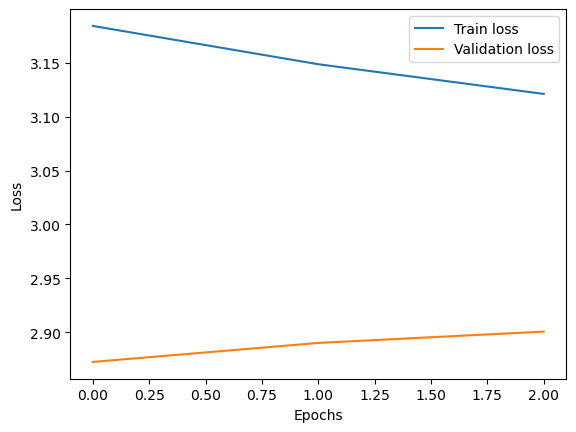

In [5]:
import matplotlib.pyplot as plt
# plot the loss curves
plt.plot(training_losses, label="Train loss")
plt.plot(validation_losses, label="Validation loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

<h1>Save Model</h1>

In [6]:
# # Saving our PyTorch model
# from pathlib import Path

# # 1. Create model's directory
# MODEL_PATH = Path("models")
# MODEL_PATH.mkdir(parents=True, exist_ok=True)

# # 2. Create model save path
# MODEL_NAME = "transformer_language_model.pth"
# MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# # 3. Save the model state dict
# torch.save(obj=transformer_model.state_dict(),f=MODEL_SAVE_PATH)
# print("saving complete")

<h1>Evaluate Model</h1>

In [7]:
from textdataset import TextDataSet
import os

tds = TextDataSet(os.getcwd()+"/data/train.jsonl", sp).evalutate_model(transformer_model)

Perplexity: 36.27865982055664 | Bleu score: 0.03639641614011966


<h1>Generate from prompts</h1>

In [8]:
# Example usage of the generate method
prompt = "Which do you prefer? Dogs or cats?"
generated_text = transformer_model.generate(sp, prompt, max_length=50, eos_token_id=0, temperature=0.9, device="mps")
print(f"Generated text: {generated_text}")

Generated text: Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which Which
